In [2]:
import glob, os
base = r"C:\Users\nusxi\OneDrive\Documents\NUS MS DSS\DSS5208 Scalable Distributed Computing for Data Science\Projects\Project 2\rf_results"
for path in glob.glob(fr"{base}\**", recursive=True):
    if path.lower().endswith(".csv"):
        print(path)


C:\Users\nusxi\OneDrive\Documents\NUS MS DSS\DSS5208 Scalable Distributed Computing for Data Science\Projects\Project 2\rf_results\metrics\part-00000-7b86df86-90ad-480d-bb10-eeb895f4ce61-c000.csv
C:\Users\nusxi\OneDrive\Documents\NUS MS DSS\DSS5208 Scalable Distributed Computing for Data Science\Projects\Project 2\rf_results\sample_predictions\part-00000-4f87417e-91df-4016-bd88-bd61b7dae6bf-c000.csv


          model       rmse
0  RandomForest  36.688287
Local RMSE: 40.1842655739143


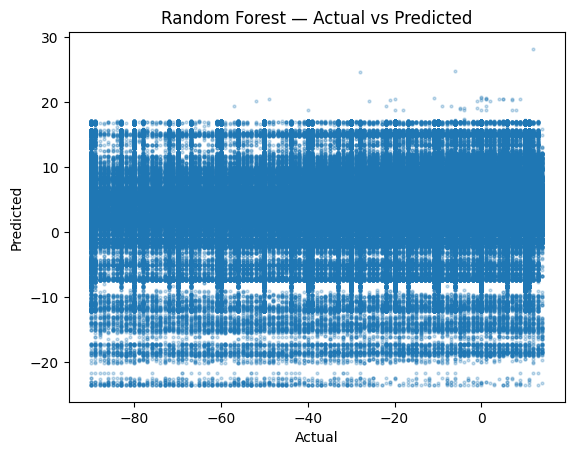

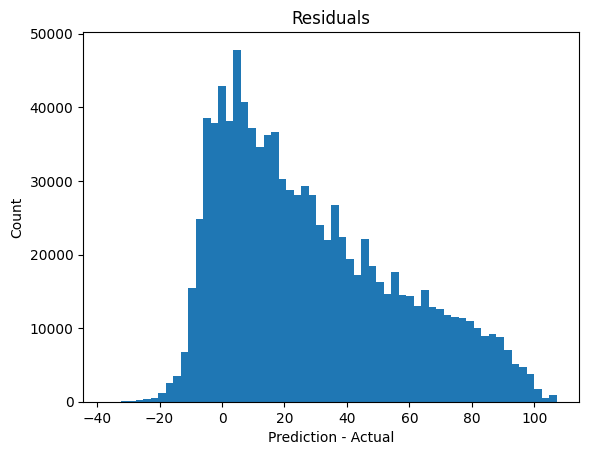

In [3]:
import glob, json, pandas as pd, numpy as np, matplotlib.pyplot as plt
base = r"C:\Users\nusxi\OneDrive\Documents\NUS MS DSS\DSS5208 Scalable Distributed Computing for Data Science\Projects\Project 2\rf_results"

# ----- Metrics (RMSE) -----
mfile = glob.glob(fr"{base}\metrics\part-*.csv")[0]
metrics = pd.read_csv(mfile)
print(metrics)  # shows model + rmse

# ----- Predictions -----
pfile = glob.glob(fr"{base}\sample_predictions\part-*.csv")[0]
preds = pd.read_csv(pfile)

# (Optional) verify RMSE locally
rmse = np.sqrt(((preds["label"] - preds["prediction"])**2).mean())
print("Local RMSE:", rmse)

# ----- Plot: Actual vs Predicted -----
plt.figure()
plt.scatter(preds["label"], preds["prediction"], s=4, alpha=0.25)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest — Actual vs Predicted")
plt.show()

# ----- Plot: Residual Histogram -----
res = preds["prediction"] - preds["label"]
plt.figure()
plt.hist(res, bins=60)
plt.xlabel("Prediction - Actual")
plt.ylabel("Count")
plt.title("Residuals")
plt.show()
